In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import dabl
from sklearn.tree import DecisionTreeClassifier

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [4]:
df1 = pd.read_csv("./data/dev.csv")
df2 = pd.read_csv("./data/new.csv")
group_df = [df1, df2]
df1.head()

,page_likes,page_interaction,page_category,tot_no_comments_bef,no_comments_24h,no_comments_48_24h,no_comments_24h_after_pub,delta_48_24h,character_count_post,no_shares_post,day_posted,current_day,has_new_comments,ID
0,23253,4595,8,1,1,0,1,1,590,16,THURSDAY,FRIDAY,yes,P1
1,5077,449,27,0,0,0,0,0,44,1,FRIDAY,SUNDAY,no,P2
2,1426027,8025,1,1,0,0,1,0,42,4,MONDAY,WEDNESDAY,no,P3
3,209071,444,55,1,1,0,1,1,84,1,FRIDAY,FRIDAY,no,P4
4,309914,5432,26,0,0,0,0,0,296,36,THURSDAY,SATURDAY,no,P5


In [3]:
print(df1.info())
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
page_likes                   10000 non-null int64
page_interaction             10000 non-null int64
page_category                10000 non-null int64
tot_no_comments_bef          10000 non-null int64
no_comments_24h              10000 non-null int64
no_comments_48_24h           10000 non-null int64
no_comments_24h_after_pub    10000 non-null int64
delta_48_24h                 10000 non-null int64
character_count_post         10000 non-null int64
no_shares_post               10000 non-null int64
day_posted                   10000 non-null object
current_day                  10000 non-null object
has_new_comments             10000 non-null object
ID                           10000 non-null object
dtypes: int64(10), object(4)
memory usage: 1.1+ MB
None


,page_likes,page_interaction,page_category,tot_no_comments_bef,no_comments_24h,no_comments_48_24h,no_comments_24h_after_pub,delta_48_24h,character_count_post,no_shares_post
count,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.371618e+06,4.209833e+04,24.510400,52.551300,20.967000,18.682300,49.62010,2.284700,168.025800,113.079800
std,1.009922e+07,1.163101e+05,20.256755,127.905581,74.173031,68.947803,120.04277,91.027173,424.035479,554.151499
min,3.600000e+01,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.00000,-1159.000000,0.000000,1.000000
25%,3.274500e+04,6.060000e+02,9.000000,2.000000,0.000000,0.000000,2.00000,-6.000000,38.000000,2.000000
50%,2.694810e+05,6.182000e+03,18.000000,10.000000,2.000000,0.000000,10.00000,0.000000,98.000000,13.000000
75%,1.203855e+06,4.939200e+04,32.000000,43.000000,11.000000,8.000000,41.00000,2.000000,172.000000,58.000000
max,4.869723e+08,3.959779e+06,106.000000,2188.000000,1975.000000,1476.000000,1975.00000,1975.000000,21480.000000,26143.000000


In [5]:
for df in group_df:
    day_dict = {"MONDAY":0, "TUESDAY":1, "WEDNESDAY":2, "THURSDAY":3, "FRIDAY":4, "SATURDAY":5, "SUNDAY":6}
    df["day_posted"] = df["day_posted"].map(dict(day_dict))
    df["current_day"] = df["current_day"].map(dict(day_dict))
    df["has_new_comments"] = df["has_new_comments"].map(dict({"yes":1, "no":0}))
df1.head(3)

,page_likes,page_interaction,page_category,tot_no_comments_bef,no_comments_24h,no_comments_48_24h,no_comments_24h_after_pub,delta_48_24h,character_count_post,no_shares_post,day_posted,current_day,has_new_comments,ID
0,23253,4595,8,1,1,0,1,1,590,16,3,4,1,P1
1,5077,449,27,0,0,0,0,0,44,1,4,6,0,P2
2,1426027,8025,1,1,0,0,1,0,42,4,0,2,0,P3


Target looks like classification


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\dabl\plot\utils.py:621: UserWarning: Dropped 32 outliers in column no_comments_24h_after_pub.
  int(dropped), series.name), UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\dabl\plot\utils.py:621: UserWarning: Dropped 18 outliers in column tot_no_comments_bef.
  int(dropped), series.name), UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\dabl\plot\utils.py:621: UserWarning: Dropped 43 outliers in column no_comments_24h.
  int(dropped), series.name), UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\dabl\plot\utils.py:621: UserWarning: Dropped 39 outliers in column no_comments_48_24h.
  int(dropped), series.name), UserWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\dabl\plot\utils.py:621: UserWarning: Dropped 80 outliers in column page_interaction.
  int(dropped), series.name), UserW

Linear Discriminant Analysis training set score: 0.639


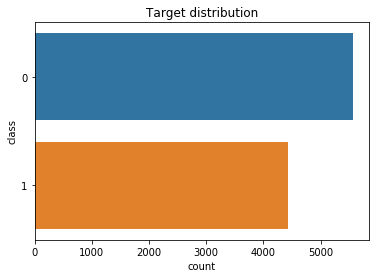

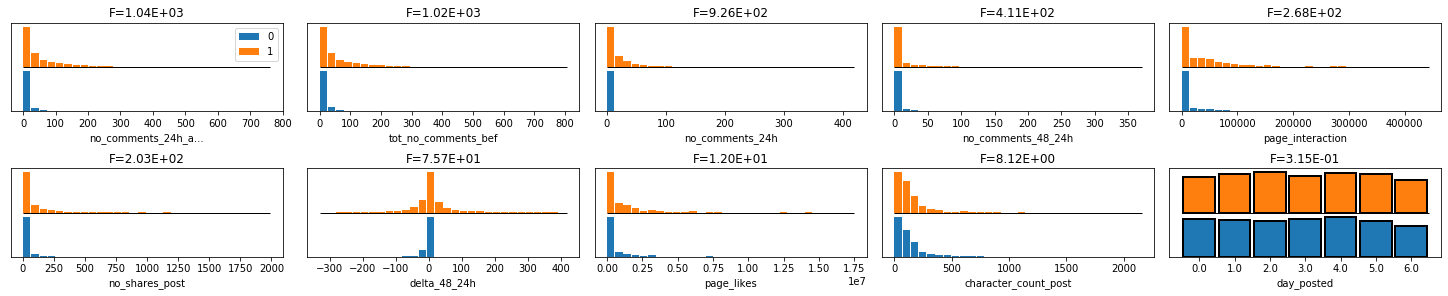

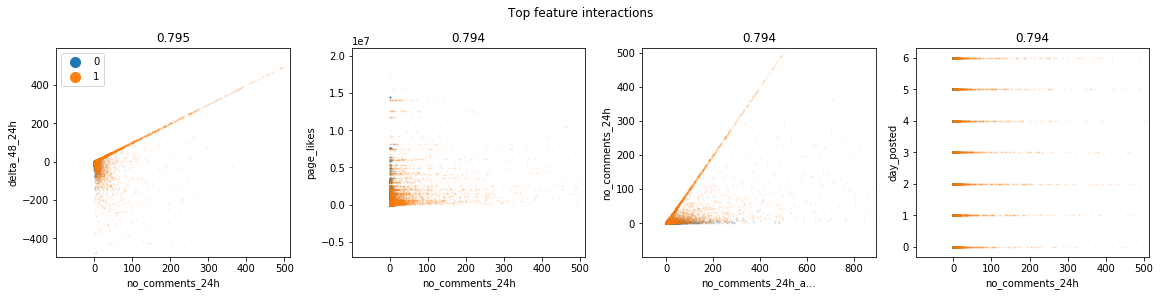

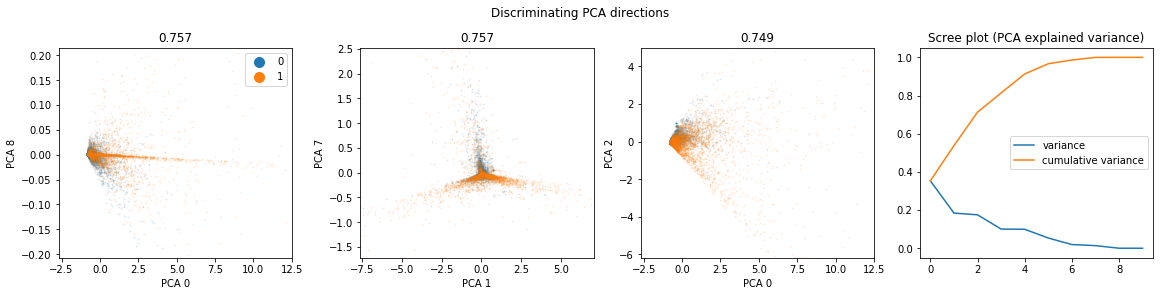

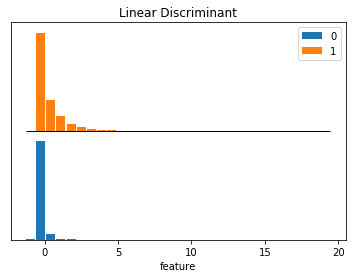

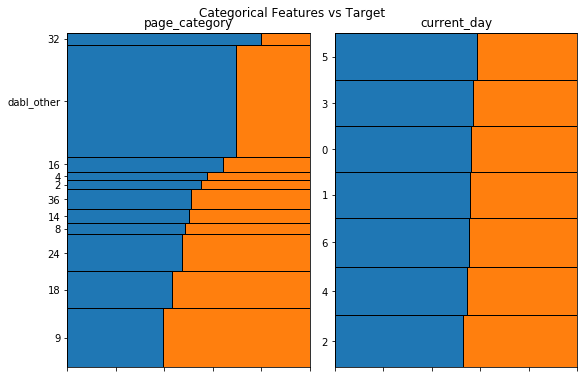

In [7]:
dabl.plot(df1, target_col="has_new_comments")

In [8]:
dabl.SimpleClassifier().fit(df1, target_col="has_new_comments")

Running DummyClassifier(strategy='prior')
accuracy: 0.557 average_precision: 0.443 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.358
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.557 average_precision: 0.443 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.358

Running GaussianNB()
accuracy: 0.528 average_precision: 0.501 roc_auc: 0.599 recall_macro: 0.571 f1_macro: 0.476
=== new best GaussianNB() (using recall_macro):
accuracy: 0.528 average_precision: 0.501 roc_auc: 0.599 recall_macro: 0.571 f1_macro: 0.476

Running MultinomialNB()
accuracy: 0.658 average_precision: 0.688 roc_auc: 0.723 recall_macro: 0.656 f1_macro: 0.655
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.658 average_precision: 0.688 roc_auc: 0.723 recall_macro: 0.656 f1_macro: 0.655

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.804 average_precision: 0.712 roc_auc: 0.796 recall_macro: 0.796 f1_macro: 0.799
=== new best DecisionTreeClas

SimpleClassifier(random_state=None, refit=True, shuffle=True, type_hints=None,
                 verbose=1)

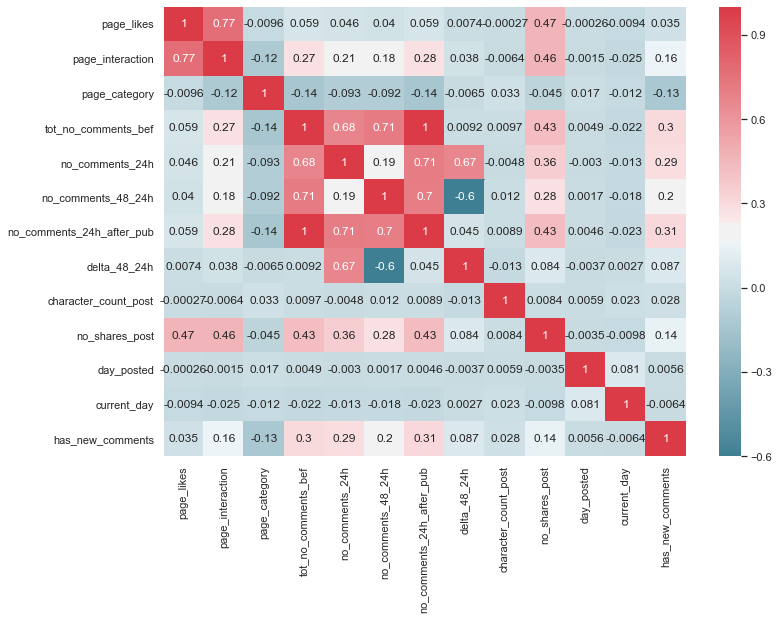

In [12]:
sns.heatmap(df1.corr(), annot=True, cmap = sns.diverging_palette(220, 10, as_cmap = True))

In [18]:
X = df1.drop(["has_new_comments", "ID"], axis=1)
y = df1["has_new_comments"]

model = DecisionTreeClassifier(class_weight='balanced', max_depth=5)
model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
df2_ids  = df2["ID"]
X = df2.drop(["has_new_comments", "ID"], axis=1)

In [21]:
res = model.predict(X)

In [22]:
res

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,

In [24]:
res_df = pd.DataFrame()
res_df["ID"] = df2_ids
res_df["has_new_comments"] = res

In [29]:
res_df["has_new_comments"] = res_df["has_new_comments"].map(dict({1:"yes", 0:"no"}))

In [35]:
res_df.set_index("ID").to_csv("./predictions/pred1.csv")